In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sony-customer-churn/datasets/Data_Science_Challenge.csv


## Assignment
This data project has been used as a take-home assignment in the recruitment process for the data science positions at Sony Research. You are provided with a sample dataset of a telecom company’s customers and it's expected to done the following tasks: 

1. Perform exploratory analysis and extract insights from the dataset.
2. Split the dataset into train/test sets and explain your reasoning.
3. Build a predictive model to predict which customers are going to churn and discuss the reason why you choose a particular algorithm.
4. Establish metrics to evaluate model performance.
5. Discuss the potential issues with deploying the model into production.

In [3]:
df= pd.read_csv("/kaggle/input/sony-customer-churn/datasets/Data_Science_Challenge.csv")
df.sample(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3076,TX,51,415,397-9251,no,no,0,180.5,88,30.69,...,102,11.45,170.7,97,7.68,10.0,3,2.70,2,False
3193,IA,88,415,410-2015,no,no,0,113.7,67,19.33,...,127,14.03,141.5,142,6.37,10.8,3,2.92,1,False
2149,IA,120,415,341-6743,no,yes,33,299.5,83,50.92,...,84,13.89,146.7,88,6.60,11.6,5,3.13,0,False
1392,OK,101,415,413-4040,no,no,0,269.7,85,45.85,...,86,17.65,214.2,107,9.64,4.5,15,1.22,3,True
873,MA,160,408,387-3332,no,no,0,166.8,109,28.36,...,117,20.06,307.6,77,13.84,9.3,1,2.51,1,False


## Understanding the Dataset
We will first explore the basic structure of the dataset, missing values, duplicate values and types of data features in the dataset. 

In [17]:
## Checking the basic structure & stats 
shape = print("Shape of the dataset is",df.shape)
basic_info = pd.DataFrame(df.describe(include='all'))
basic_info

Shape of the dataset is (3333, 21)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333,3333.000000,3333.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,3333,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,382-4657,no,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,1,3010,2411,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,...,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,...,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,...,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,...,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [19]:
# Checking for missing values in the dataframe
missing_values=df.isna().sum()
missing_values

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

No missing values in the dataset.

In [20]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

if duplicate_rows.empty:
    print("No duplicate values found.")
else:
    print("Duplicate values found:")
    print(duplicate_rows)

No duplicate values found.


In [24]:
# Check for na values
null_values=df.isna().sum()
print(null_values)

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


Hence, no null values in the dataset. As we have seen above the dataset is clean, no null values/duplicate values or missing values. Now, we'll check for data types in the dataset as we have to build a prediction classifier on the line.

## Data Preprocessing

In [40]:
# Select columns that are not numeric
non_numeric_columns = df.select_dtypes(exclude=['int', 'float','bool'])

# Displaying all types of data types
print("\n All types of datatypes are as follows:\n",df.dtypes)
print("\n \nAll the non numeric data types are as follows:\n",non_numeric_columns.dtypes)


 All types of datatypes are as follows:
 state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

 
All the non numeric data types are as follows:
 state                 object
phone number          object
international plan    object
voice mail plan       object
dtype: object


As we can see only 4 columns are non numerical which are : state ,phone number, international_plan, voice mail plan.

In [44]:
# The columns we want to display
columns_to_display = ['state','phone number','international plan','voice mail plan']  # Replace with the actual column names

# Display only the specified columns
df[columns_to_display]

,state,phone number,international plan,voice mail plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no
...,...,...,...,...
3328,AZ,414-4276,no,yes
3329,WV,370-3271,no,no
3330,RI,328-8230,no,no
3331,CT,364-6381,yes,no


Phone number wil not be a important feature for predicting churn rate of customers. So, we will drop that feature. As internation plan & voice mail plan will be important feature for the project we will perform encoding for those features.


## Feature Engineering

In [50]:
# Feature Encoding of Voice Mail Plan feature
df["voice mail plan"].loc[df["voice mail plan"] == "no"] = 0
df["voice mail plan"].loc[df["voice mail plan"] == "yes"] = 1
df["voice mail plan"] = df["voice mail plan"].astype("int64")
df["voice mail plan"]

/tmp/ipykernel_33/1643401697.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["voice mail plan"].loc[df["voice mail plan"] == "no"] = 0
/tmp/ipykernel_33/1643401697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy o

0       1
1       1
2       0
3       0
4       0
       ..
3328    1
3329    0
3330    0
3331    0
3332    1
Name: voice mail plan, Length: 3333, dtype: int64

In [53]:
area_code_dummies = pd.get_dummies(df["area code"])
area_code_dummies = area_code_dummies.add_prefix('area_code_').replace({True: 1, False: 0})
area_code_dummies

/tmp/ipykernel_33/3425335733.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  area_code_dummies = area_code_dummies.add_prefix('area_code_').replace({True: 1, False: 0})


,area_code_408,area_code_415,area_code_510
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
3328,0,1,0
3329,0,1,0
3330,0,0,1
3331,0,0,1


In [54]:
# Feature encoding of International Plan feature
df["international plan"].loc[df["international plan"] == "no"] = 0
df["international plan"].loc[df["international plan"] == "yes"] = 1
df["international plan"] = df["international plan"].astype("int64")
df["international plan"]

/tmp/ipykernel_33/3058834609.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["international plan"].loc[df["international plan"] == "no"] = 0
/tmp/ipykernel_33/3058834609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a 

0       0
1       0
2       0
3       1
4       1
       ..
3328    0
3329    0
3330    0
3331    1
3332    0
Name: international plan, Length: 3333, dtype: int64

## Removing the irrelavant features from the dataset

In [55]:
# form final dataset
df_final = df.drop(columns=["phone number", "state", "area code"])
df_final = pd.concat([df_final,area_code_dummies], axis=1)
df_final

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area_code_408,area_code_415,area_code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,False,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,False,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,False,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,False,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,False,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,...,83,12.56,9.9,6,2.67,2,False,0,1,0
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,...,123,8.61,9.6,4,2.59,3,False,0,1,0
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,...,91,8.64,14.1,6,3.81,2,False,0,0,1
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,...,137,6.26,5.0,10,1.35,2,False,0,0,1


## Correlation Analysis

Now, we will check for correlation between churn and all other features to find out which are our important features for our further project.

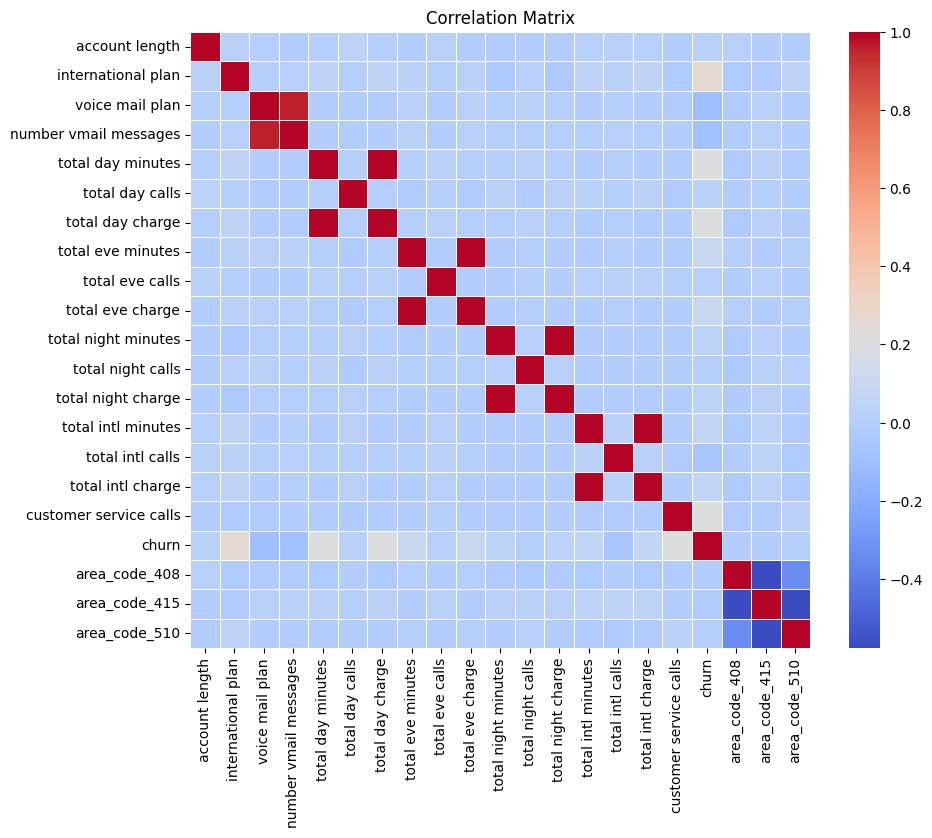

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df_final.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Check Different distribution 

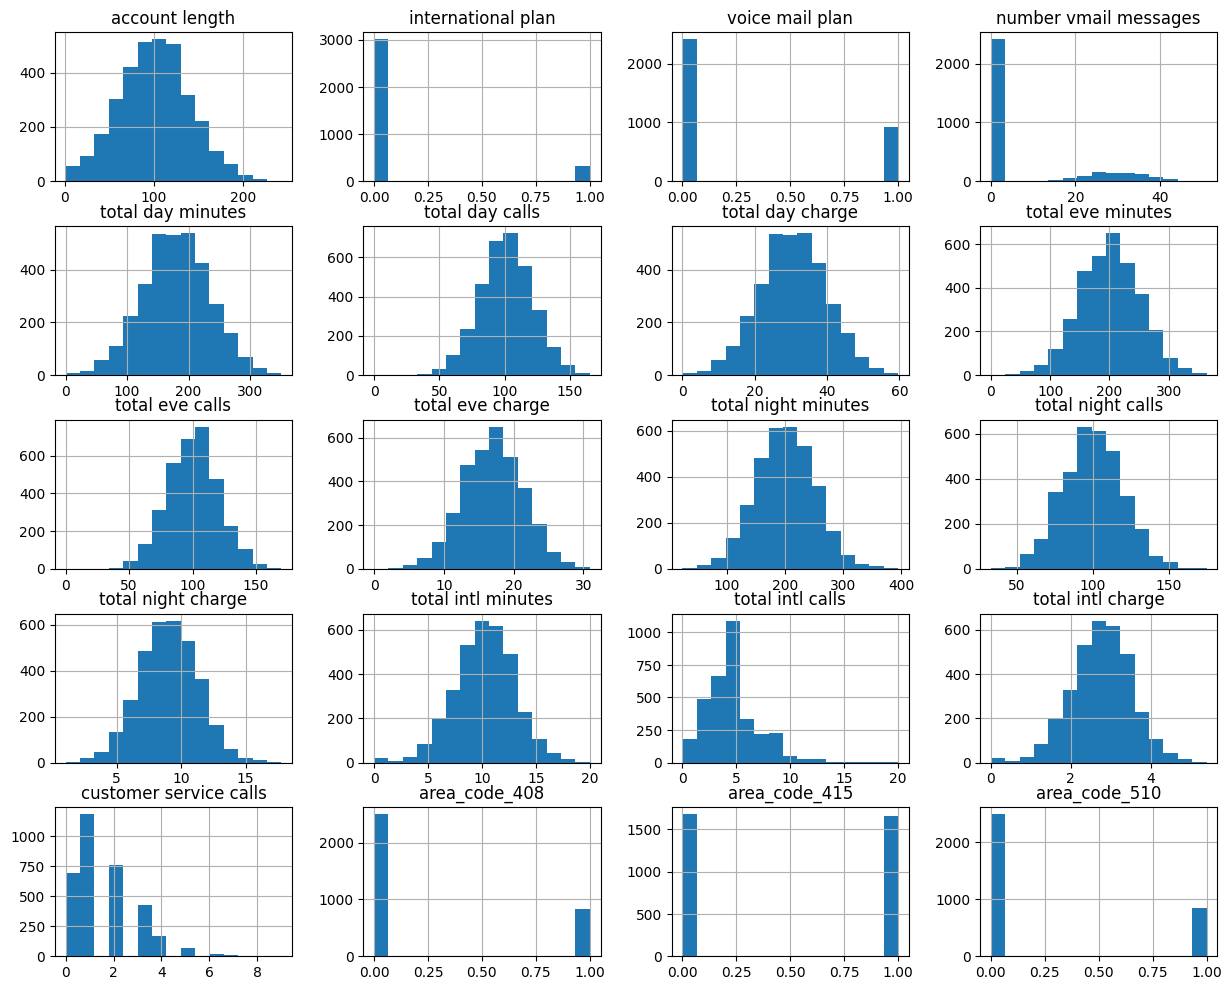

In [62]:
df_final.hist(figsize=(15,12),bins = 15)
plt.show()

In [63]:
# check classes ratio
df_final.groupby(['churn'])['churn'].count()


churn
False    2850
True      483
Name: churn, dtype: int64

The distributions tell us:
- Most customers don't use voice mail service and international plans. 
- Half of the customers live in area code 415.
- The company earns more by total day calls (check total day charge).
- We have an imbalanced dataset which could be tricky when choosing evaluation metrics.

## Correlation Analysis

<Axes: >

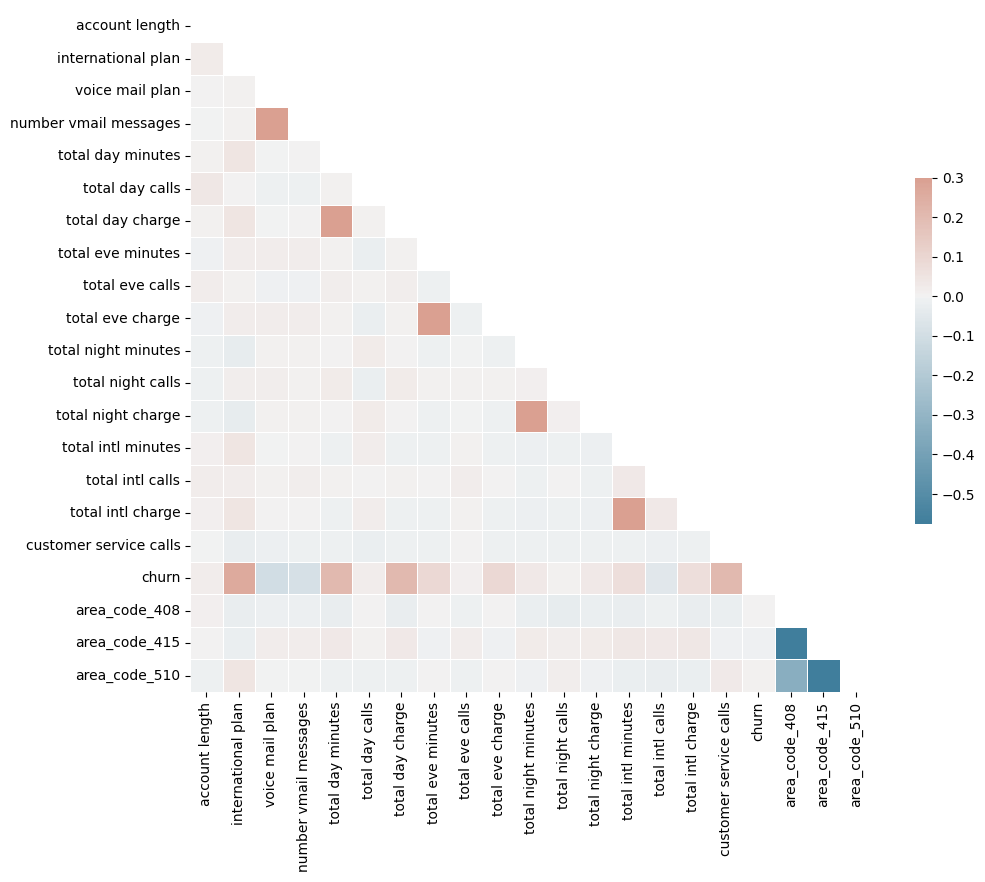

In [64]:
# some insights into the relationship between features
# observe the correlation.

import matplotlib.pyplot as plt
import seaborn as sns

# it could take some time to run this cell since we are calculating correlation matrix in a dimesion of (100x100)
# to have a better visualization, we will take only one triangle 
# because other trangle is only its symmetry (i.e a x b and b x a)

# Generate a mask for the upper triangle
corr = df_final.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the correlation matrix, we observe the following things:

There is a positive correlation between:

- total day charge, total day minutes, and churn
- total eve minutes and total eve charge
- total night minutes and total night charge
- total intl minutes and total intl charge
- total customer service calls and churn
- number vmail messages and voice mail
- international plan and churn

There is a negative correlation between:

- churn and voice mail plan
- churn and number vmail messages
- churn and total intl calls

## Checking Importance of features using Gini importance method

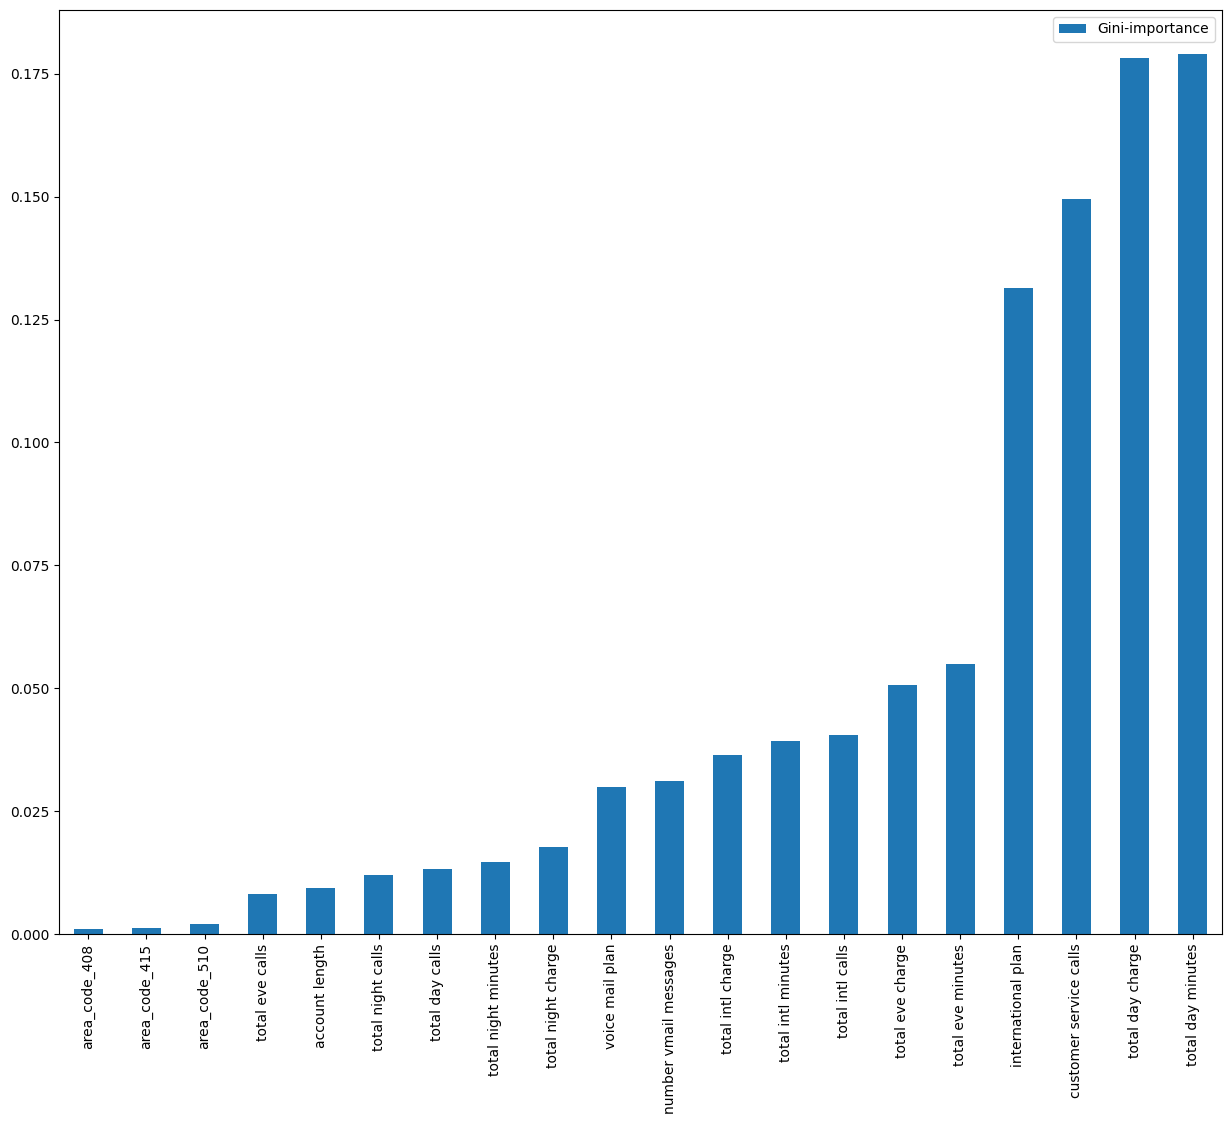

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

le = preprocessing.LabelEncoder()
# apply label encoder for churn since its values are also categories
y = le.fit_transform(df_final["churn"])

# drop label column
X = df_final.drop(columns=["churn"])

# train-test split
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# selected features are selected in multicollinearity check part
feature_names = [f"feature {i}" for i in range((X.shape[1]))]
forest =  RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df_final.drop(columns=["churn"]).columns, forest.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(15,12))
plt.show()

Gini-importance shows us which features would be most useful if we build a tree-based model with given features. According to the analysis above, the most important three features of churn are: total day charge, total day minutes, and customer service calls.



## Train Test Split
In this notebook, we will mostly apply machine learning methods for the given problem. Therefore, we will prefer to use an 80%-20% split since it is used as the most common ratio in applications (not including Deep Learning). Furthermore, we have an imbalanced dataset in terms of class distributions. We can use stratify option of train_test_split( ) function of sklearn to split data to train and test datasets with the same distribution and be sure that samples of the test or train dataset are not only formed by the majority class.

In [66]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# apply label encoder for churn since its values are also categories
y = le.fit_transform(df_final["churn"])


In [67]:
X = df_final.drop(columns=["churn"])

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Predictive Model

In [69]:
# Apply classifiers and decide to pick one to use in production based on the performance
# Hyperparameters of the given classifiers are chosen as trial-error 

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "XGBoost",
    "LightGBM"
]

classifiers = [

    KNeighborsClassifier(3), 
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', seed=0),
    LGBMClassifier(random_state=42),
]

## Evaluation
This is a classification task, and the most commonly used metric is accuracy. But, we have an imbalanced dataset, which means we need to be careful about our evaluations. F1 score balances the precision and recall so we can have a good metric even for imbalanced datasets. Hence, we will use accuracy and the F1 score while comparing the performance of different algorithms.

In [71]:
from sklearn.metrics import f1_score
for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        acc_score = clf.score(X_test, y_test)
        y_pred = clf.predict(X_test)
        f_score = f1_score(y_test, y_pred, average='macro')
        print("accuracy:", "{:.2f}".format(acc_score), "f1_score:", "{:.2f}".format(f_score), "Model:", name)

accuracy: 0.89 f1_score: 0.72 Model: Nearest Neighbors
accuracy: 0.85 f1_score: 0.46 Model: Linear SVM
accuracy: 0.85 f1_score: 0.46 Model: RBF SVM
accuracy: 0.93 f1_score: 0.85 Model: Gaussian Process
accuracy: 0.94 f1_score: 0.86 Model: Decision Tree
accuracy: 0.90 f1_score: 0.73 Model: Random Forest
accuracy: 0.93 f1_score: 0.85 Model: Neural Net
accuracy: 0.88 f1_score: 0.70 Model: AdaBoost
accuracy: 0.85 f1_score: 0.70 Model: Naive Bayes
accuracy: 0.89 f1_score: 0.78 Model: QDA


/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


accuracy: 0.96 f1_score: 0.92 Model: XGBoost
[LightGBM] [Info] Number of positive: 382, number of negative: 2284
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2401
[LightGBM] [Info] Number of data points in the train set: 2666, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143286 -> initscore=-1.788263
[LightGBM] [Info] Start training from score -1.788263
accuracy: 0.95 f1_score: 0.89 Model: LightGBM


## Deep Learning Model
What would be the performance of Artificial Neural Network (ANN) for the given problem (without spending hours on hyperparameter optimization - just experimenting)?

In [73]:
# sequential model to initialise our ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense
# to have reproducible results
import tensorflow 
tensorflow.random.set_seed(42)

classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

loss, accuracy = classifier.evaluate(X_train, y_train,
                            batch_size=10)

print('Train accuracy:', accuracy)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
loss, accuracy = classifier.evaluate(X_test, y_test,
                            batch_size=10)

print('Test accuracy:', accuracy)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

f1_score = f1_score(y_test, y_pred)
print('Test F1-score:', f1_score)

2024-02-16 22:32:31.390467: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-16 22:32:31.390662: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-16 22:32:31.582255: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


267/267 [==============================] - 1s 1ms/step - loss: 0.2062 - accuracy: 0.9306
Train accuracy: 0.9306076765060425
21/21 [==============================] - 0s 1ms/step
********************
67/67 [==============================] - 0s 2ms/step - loss: 0.2228 - accuracy: 0.9310
Test accuracy: 0.931034505367279
[[557   9]
 [ 37  64]]
Test F1-score: 0.7356321839080459


The performance of ANN couldn't beat the result of tree-based algorithms. In this case, we can continue with XGBoost as the algorithm will be in production due to it has combination of high accuracy and F1 score.

## Deployment Issues

After the deployment of our ML model to production, we need to continue to monitor its performance since it could degrade over time due to internal or external reasons. It is recommended to update our models periodically, such as training with recent data to avoid common problems. There are two significant problems with the MLOps cycle:

- **Data drift**: Data drift is the situation where the model’s input distribution changes. It could be caused by broken data ingestion or serving pipeline, or a change in the nature of your problem. We can resolve this issue by fixing the broken data engineering pipelines where applicable or by training our model with more data including more recent data points if there is no deterioration in the data quality.

- **Concept drift**: Concept drift is the situation when the functional relationship between the model inputs and outputs changes. The context has changed, but the model doesn’t know about the change. Its learned patterns do not hold anymore. Hence, we need to learn a new model and even use another algorithm if our particular algorithm's performance is not good enough to use in production.

## Thank you for joining!
Let me know if you have any question regarding any part of this project. And please upvote this notebook, I keep working on such awesome projects everyday. Thank you, let's connect and grow together!!